In [3]:
import numpy as np
import pyttsx3
import time
yuyin = pyttsx3.init()
def get_points(results):
    count = 0
    num = 0
    all_num = []
    flip_list = []
    coords=np.array(results.pose_landmarks.landmark)

    def get_x(each):
        return each.x
    def get_y(each):
        return each.y
    def get_z(each):
        return each.z

    points_x=np.array(list(map(get_x,coords)))
    points_y=np.array(list(map(get_y,coords)))
    points_z=np.array(list(map(get_z,coords)))

    points=np.vstack((points_x,points_y,points_z)).T
    return points[0][1]

In [4]:
import cv2
import mediapipe as mp
from tqdm import tqdm
import time

mp_pose = mp.solutions.pose

mp_drawing = mp.solutions.drawing_utils

pose = mp_pose.Pose(static_image_mode=True,  
                    model_complexity=2, 
                    smooth_landmarks=True,  
                    enable_segmentation=True,  
                    min_detection_confidence=0.5,  
                    min_tracking_confidence=0.5) 

In [40]:
def countytxs():
    flag = False
    count = 0
    num = 0
    x = []
    y = []
    count_list = [0]

    cap = cv2.VideoCapture(0)

    cap.open(0)
    fp = 1
    i=-1
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    out = cv2.VideoWriter('output.mp4', fourcc, 13, (640, 480))
    #start_time = time.time()
    #print(start_time)
    #time.sleep(interval)

    while cap.isOpened():

        success, frame = cap.read()
        if success:
            if (fp==1):
                #time.sleep(interval)
                print('原地深蹲，一组60秒')
                yuyin.say('原地深蹲，一组60秒')
                yuyin.runAndWait()
                print('3,2,1,开始~')
                yuyin.say('3,2,1,开始~')
                yuyin.runAndWait()
                start_time = time.time()
                fp = 0
            else:
                #print(num)
                #frame = cv2.flip(frame, 1)

                end_time = time.time()
                #print(end_time)
                if end_time - start_time >= 60:
                    break
        else:
            print('Error')
            break

        # frame = process_frame(frame)
        img_RGB = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

        results = pose.process(img_RGB)
        h, w = frame.shape[0], frame.shape[1]
        try:
            mp_drawing.draw_landmarks(frame, results.pose_landmarks, mp_pose.POSE_CONNECTIONS)
            for i in range(33): 

                cx = int(results.pose_landmarks.landmark[i].x * w)
                cy = int(results.pose_landmarks.landmark[i].y * h)
                cz = results.pose_landmarks.landmark[i].z
                radius = 5
                if i == 0:  
                    img = cv2.circle(frame, (cx, cy), radius, (0, 0, 255), -1)
                elif i in [11, 12]:  
                    img = cv2.circle(frame, (cx, cy), radius, (233, 155, 6), -1)
                elif i in [23, 24]:  
                    img = cv2.circle(frame, (cx, cy), radius, (1, 240, 255), -1)
                elif i in [13, 14]:  
                    img = cv2.circle(frame, (cx, cy), radius, (140, 47, 240), -1)
                elif i in [25, 26]:  
                    img = cv2.circle(frame, (cx, cy), radius, (0, 0, 255), -1)
                elif i in [15, 16, 27, 28]:  
                    img = cv2.circle(frame, (cx, cy), radius, (223, 155, 60), -1)
                elif i in [17, 19, 21]:  
                    img = cv2.circle(frame, (cx, cy), radius, (94, 218, 121), -1)
                elif i in [18, 20, 22]:  
                    img = cv2.circle(frame, (cx, cy), radius, (16, 144, 247), -1)
                elif i in [27, 29, 31]:  
                    img = cv2.circle(frame, (cx, cy), radius, (29, 123, 243), -1)
                elif i in [28, 30, 32]:  
                    img = cv2.circle(frame, (cx, cy), radius, (193, 182, 255), -1)
                elif i in [9, 10]:  
                    img = cv2.circle(frame, (cx, cy), radius, (205, 235, 255), -1)
                elif i in [1, 2, 3, 4, 5, 6, 7, 8]:  
                    img = cv2.circle(frame, (cx, cy), radius, (94, 218, 121), -1)
                else: 
                    img = cv2.circle(frame, (cx, cy), radius, (0, 255, 0), -1)
            point = get_points(results)
            y.append(point)
            x.append(num)
            num += 1
            print(num)
            if len(y) < 2:
                continue
            pre_point = y[len(y) - 2]
            if point > pre_point and point - pre_point >= 0.15:
                flag =  True
            if point < pre_point and flag == True and pre_point - point>= 0.15:
                count = count+1
                flag = False
            else:
                pass
        except:
            pass
  
        cv2.putText(frame, str(count), (450, 100), cv2.FONT_HERSHEY_TRIPLEX, 1.5, (0, 0, 255), 2)
        out.write(frame)
        cv2.imshow('my_window', frame)
        #end_time = time.time()
        #if num == 100:
        #if end_time - start_time == 60:  
        if cv2.waitKey(1) in [ord('q'), 27]:
            break

    cap.release()

    print('一分钟时间到')
    yuyin.say('一分钟时间到')
    yuyin.runAndWait()

    cv2.destroyAllWindows()
    print('运动结束，放松一下吧~')
    yuyin.say('运动结束，放松一下吧~')
    yuyin.say("您本次深蹲运动做了"f'{count}'"个，继续加油~")
    yuyin.runAndWait()
    return x,y,count

原地深蹲，一组60秒
3,2,1,开始~
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
一分钟时间到
运动结束，放松一下吧~


<Figure size 864x720 with 0 Axes>

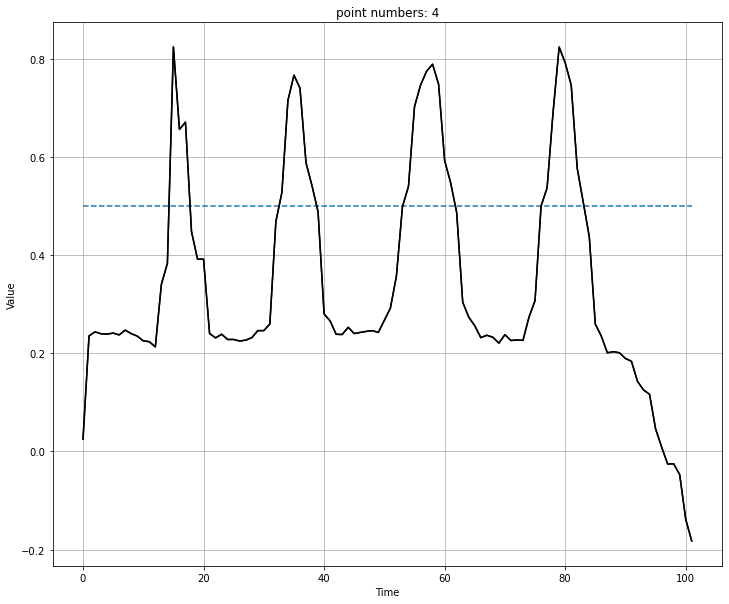

In [42]:
import math
from matplotlib import pyplot as plt
import numpy as np
import os
from scipy import signal
from scipy.signal import find_peaks

def LabberRing(x,y):
    plt.figure(figsize=(12, 10))
    # Input signal
    t=np.array(x)
    series = np.array(y)
    # Threshold value (for height of peaks and valleys)
    thresh = 0.5
    # Find indices of peaks
    peak_idx, _ = find_peaks(series, height=thresh)
    plt.plot([min(t), max(t)], [thresh, thresh], '--')

    # Plot signal
    plt.plot(t, series,'k')
    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.title(f"point numbers: {count}")
    # plt.grid()网格线设置
    plt.grid(True)
    plt.savefig("figure_2.png")
    plt.show()
    return


if __name__ == "__main__":
    x, y ,count= countytxs()
    plt.figure(figsize=(12, 10))
    #count = get_count(x, y)
    LabberRing(x, y)

